In [546]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import seaborn as sns

## Flow Diagram

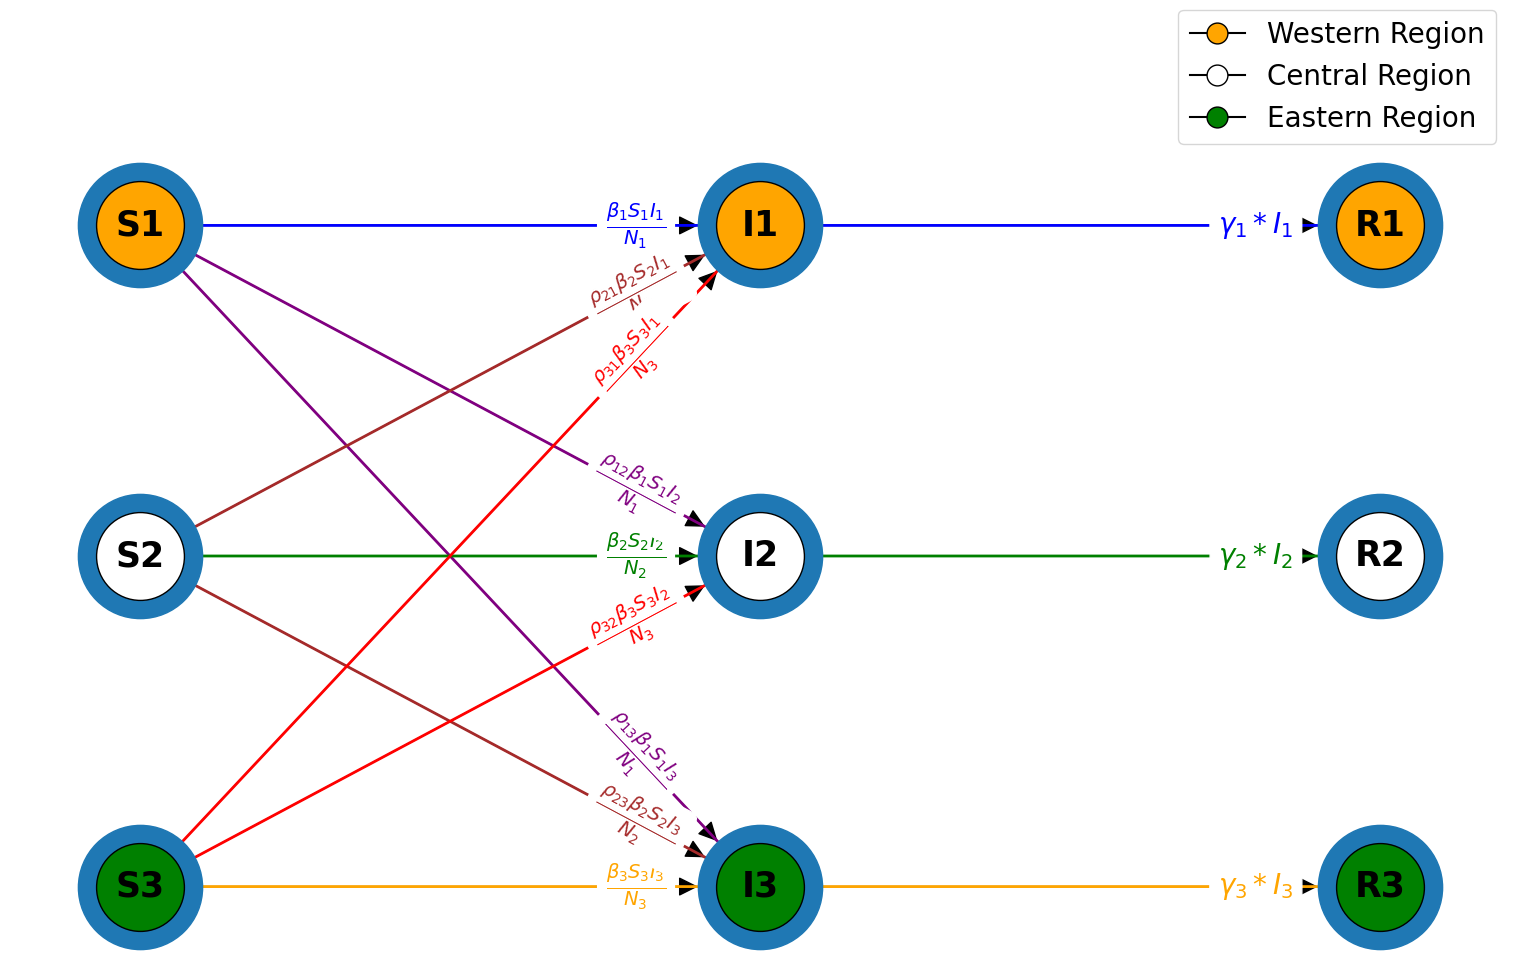

In [547]:
# Define the network
G = nx.DiGraph()

# Add nodes for each compartment in each city
nodes = ['S1', 'I1', 'R1', 'S2', 'I2', 'R2', 'S3', 'I3', 'R3']
G.add_nodes_from(nodes)

# Add edges representing the flow between compartments
edges = [
    ('S1', 'I1'), ('I1', 'R1'),
    ('S2', 'I2'), ('I2', 'R2'),
    ('S3', 'I3'), ('I3', 'R3'),

    ('S1', 'I2'), ('S1', 'I3'),
    ('S2', 'I1'), ('S2', 'I3'),
    ('S3', 'I1'), ('S3', 'I2')
]
G.add_edges_from(edges)

# Create a layout for our nodes
pos = {
    'S1': (1, 2), 'I1': (2, 2), 'R1': (3, 2),
    'S2': (1, 1), 'I2': (2, 1), 'R2': (3, 1),
    'S3': (1, 0), 'I3': (2, 0), 'R3': (3, 0),
}

# Set figure size
plt.figure(figsize=(15, 8))

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=8000, font_size=25, arrowsize=30)

# Add node colors for each region
node_colors = {
    'S1': 'orange', 'I1': 'orange', 'R1': 'orange',
    'S2': 'white', 'I2': 'white', 'R2': 'white',
    'S3': 'green', 'I3': 'green', 'R3': 'green',
}

# Draw nodes with specified colors for each region
nx.draw_networkx_nodes(G, pos, nodelist=['S1', 'I1', 'R1'], node_color=node_colors['S1'], node_size=4000,edgecolors='black')
nx.draw_networkx_nodes(G, pos, nodelist=['S2', 'I2', 'R2'], node_color=node_colors['S2'], node_size=4000,edgecolors='black')
nx.draw_networkx_nodes(G, pos, nodelist=['S3', 'I3', 'R3'], node_color=node_colors['S3'], node_size=4000,edgecolors='black')

# Specify edge colors
edge_colors = {('S1', 'I1'): 'blue', ('I1', 'R1'): 'blue',
               ('S2', 'I2'): 'green', ('I2', 'R2'): 'green',
               ('S3', 'I3'): 'orange', ('I3', 'R3'): 'orange',
               ('S1', 'I2'): 'purple', ('S1', 'I3'): 'purple',
               ('S2', 'I1'): 'brown', ('S2', 'I3'): 'brown',
               ('S3', 'I1'): 'red', ('S3', 'I2'): 'red'
              }

# Draw edges with specified colors
nx.draw_networkx_edges(G, pos, edge_color=[edge_colors[edge] for edge in G.edges()], width=2)

# Add labels
labels = {('S1', 'I1'): r'$\frac{\beta_1 S_1 I_1}{N_1}$', ('I1', 'R1'): r'$\gamma_{1}*I_{1}$',
          ('S2', 'I2'): r'$\frac{\beta_2 S_2 I_2}{N_2}$', ('I2', 'R2'): r'$\gamma_{2}*I_{2}$',
          ('S3', 'I3'): r'$\frac{\beta_3 S_3 I_3}{N_3}$', ('I3', 'R3'): r'$\gamma_{3}*I_{3}$',

          ('S1', 'I2'): r'$\frac{\rho_{12} \beta_1 S_1 I_2}{N_1}$', ('S1', 'I3'): r'$\frac{\rho_{13} \beta_1 S_1 I_3}{N_1}$',
          ('S2', 'I1'): r'$\frac{\rho_{21} \beta_2 S_2 I_1}{N_2}$', ('S2', 'I3'): r'$\frac{\rho_{23} \beta_2 S_2 I_3}{N_2}$',
          ('S3', 'I1'): r'$\frac{\rho_{31} \beta_3 S_3 I_1}{N_3}$', ('S3', 'I2'): r'$\frac{\rho_{32} \beta_3 S_3 I_2}{N_3}$'
          }

# Draw edge labels with specified colors
for (u, v), label in labels.items():
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): label}, font_color=edge_colors[(u, v)], font_size=20, label_pos=0.20, verticalalignment='center')

# Add legend
region_legend = {'Western Region': 'orange', 'Central Region': 'white', 'Eastern Region': 'green'}
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='black', markerfacecolor=color, markersize=15, label=label) for label, color in region_legend.items()], loc='upper right', bbox_to_anchor=(1, 1.2),prop={'size': 20})

# Show the plot
plt.show()


In [548]:
data = pd.read_excel('ProjectFinalData.xlsx')
data = data.T

In [549]:
print(data)

      0   1   2   3   4   5   6   7    8   9   ...  15  16  17  18  19  20  \
0    289  22   1   8   2  80   3   1    0  20  ...   2   0   6   1   0   1   
1    248  44   5  10   1  24   4   0    1   0  ...   0   0   1   0   0   0   
2    557  63   2   2  39   0   3   0    0   0  ...   3   1   0   1   1   1   
3    157  56   0  79   0   2   2   0    0   1  ...   5   0   5   0   0   0   
4    260  35   1  27   3   4  11   0    0   1  ...   0   1   0   0   0   0   
..   ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ..  ..  ..  ..  ..  ..   
132   56  35   4  13   1   2   2   1   78  13  ...   1   9   1   0   0   0   
133   47  40   2  14  27   3   6   2    5  31  ...  13   1   0  17   0   0   
134   59  18   5  10   6   4  10   0  109   0  ...  10   7   0   5   2   0   
135   27  25   0  13   5   5   3   0   46  20  ...  15   3   2  11   1  11   
136   28  20   2  15   0   2   6   0   21   5  ...   3   1   0   0   7   0   

     21  22  23  24  
0     0   0   0   0  
1     0   0   0   0

In [550]:
# Load the Excel file
df = pd.read_excel('ProjectFinalData.xlsx')

# Transpose the DataFrame
dft = df.T
print(dft)

      0   1   2   3   4   5   6   7    8   9   ...  15  16  17  18  19  20  \
0    289  22   1   8   2  80   3   1    0  20  ...   2   0   6   1   0   1   
1    248  44   5  10   1  24   4   0    1   0  ...   0   0   1   0   0   0   
2    557  63   2   2  39   0   3   0    0   0  ...   3   1   0   1   1   1   
3    157  56   0  79   0   2   2   0    0   1  ...   5   0   5   0   0   0   
4    260  35   1  27   3   4  11   0    0   1  ...   0   1   0   0   0   0   
..   ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ..  ..  ..  ..  ..  ..   
132   56  35   4  13   1   2   2   1   78  13  ...   1   9   1   0   0   0   
133   47  40   2  14  27   3   6   2    5  31  ...  13   1   0  17   0   0   
134   59  18   5  10   6   4  10   0  109   0  ...  10   7   0   5   2   0   
135   27  25   0  13   5   5   3   0   46  20  ...  15   3   2  11   1  11   
136   28  20   2  15   0   2   6   0   21   5  ...   3   1   0   0   7   0   

     21  22  23  24  
0     0   0   0   0  
1     0   0   0   0

In [551]:
cities = ['COL', 'GAM', 'PUT', 'KAL', 'ANU', 'KAN', 'KUR', 'POL', 'JAF', 'RAT', 'KEG', 'MON', 'MAL', 'GAL', 'AMP', 'BAD', 'MAT', 'BAT', 'HAM', 'VAV', 'TRI', 'NE','KIL','MAN', 'MUL']
dft.columns = cities

In [552]:
total_cases = dft.sum().sort_values(ascending=False)

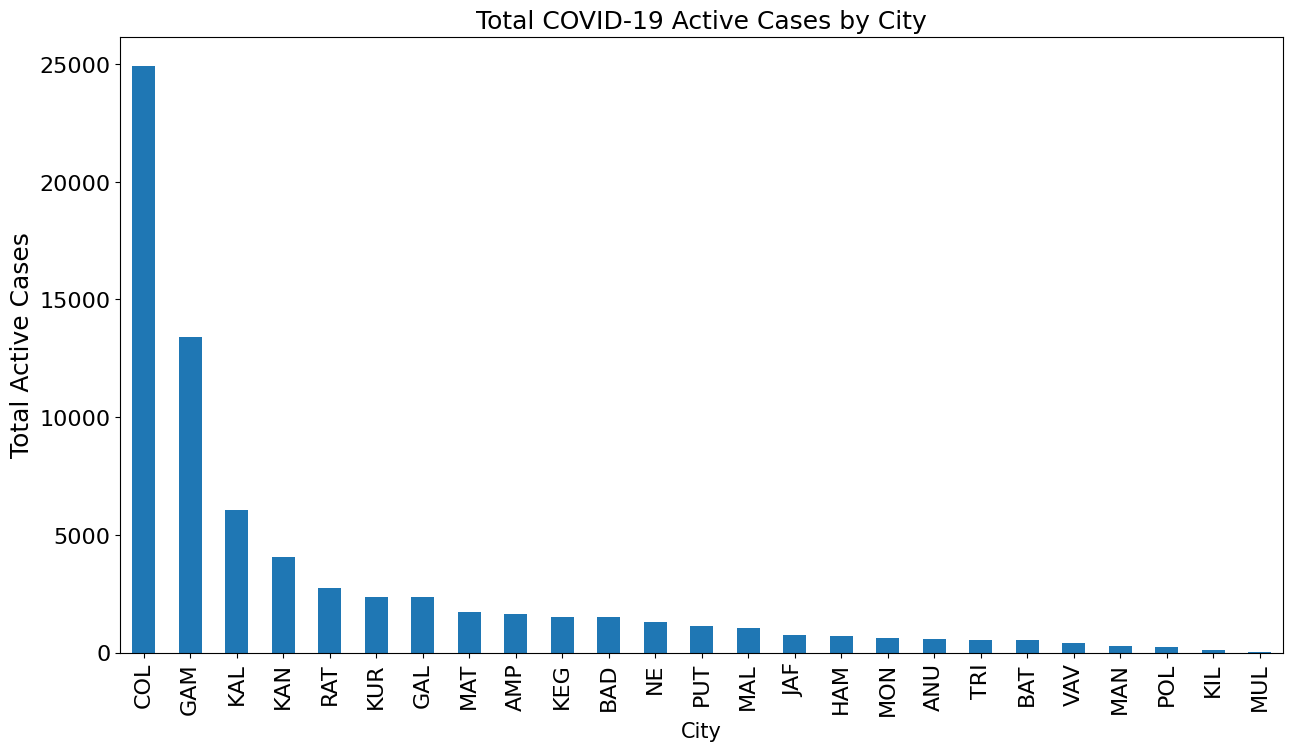

In [553]:
plt.figure(figsize=(15, 8))
total_cases.plot(kind='bar')
plt.title('Total COVID-19 Active Cases by City',fontsize = 18)
plt.xlabel('City',fontsize = 15)
plt.ylabel('Total Active Cases',fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plt.show()

In [554]:
df = dft

In [555]:
dfx = dft.copy()

In [556]:
# Create date range
start_date = '2020-11-14'
end_date = '2021-03-30'
dates = pd.date_range(start=start_date, end=end_date)

if len(dfx) == len(dates):
    dfx['Date'] = dates
else:

    print("Number of rows in dfx does not match the number of dates in the range.")

# Display the DataFrame
dfx

,COL,GAM,PUT,KAL,ANU,KAN,KUR,POL,JAF,RAT,...,MAT,BAT,HAM,VAV,TRI,NE,KIL,MAN,MUL,Date
0,289,22,1,8,2,80,3,1,0,20,...,0,6,1,0,1,0,0,0,0,2020-11-14
1,248,44,5,10,1,24,4,0,1,0,...,0,1,0,0,0,0,0,0,0,2020-11-15
2,557,63,2,2,39,0,3,0,0,0,...,1,0,1,1,1,0,0,0,0,2020-11-16
3,157,56,0,79,0,2,2,0,0,1,...,0,5,0,0,0,1,0,0,0,2020-11-17
4,260,35,1,27,3,4,11,0,0,1,...,1,0,0,0,0,1,0,0,0,2020-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,56,35,4,13,1,2,2,1,78,13,...,9,1,0,0,0,17,0,0,0,2021-03-26
133,47,40,2,14,27,3,6,2,5,31,...,1,0,17,0,0,0,0,0,0,2021-03-27
134,59,18,5,10,6,4,10,0,109,0,...,7,0,5,2,0,0,0,2,0,2021-03-28
135,27,25,0,13,5,5,3,0,46,20,...,3,2,11,1,11,1,1,0,2,2021-03-29


In [557]:

# Define regions
region_assignments = {
    'western_region': ['GAM', 'KEG', 'COL', 'KAL', 'GAL', 'RAT', 'MAT'],
    'central_region': ['JAF', 'KIL', 'MUL', 'MAN','VAV','ANU','TRI','PUT', 'KUR'],
    'eastern_region': ['POL', 'MAL', 'BAT', 'KAN', 'BAD', 'MON', 'HAM', 'AMP', 'NE']
}

# Initialize regional columns with zero values
for region in region_assignments:
    dfx[region] = 0

# Sum city values for each region
for region, cities in region_assignments.items():
    dfx[region] = dfx[cities].sum(axis=1)

# Group by Date and sum the regional values
grouped_df = dfx.groupby('Date')[list(region_assignments.keys())].sum()

# Display the result in descending order
grouped_df = grouped_df.sort_values(by='Date', ascending=True)
print(grouped_df)

            western_region  central_region  eastern_region
Date                                                      
2020-11-14             349               7              93
2020-11-15             348              11              26
2020-11-16             630              46               5
2020-11-17             311               2              16
2020-11-18             330              15               5
...                    ...             ...             ...
2021-03-26             135              85              28
2021-03-27             140              40              64
2021-03-28              97             134              27
2021-03-29              90              69              46
2021-03-30              87              39              24

[137 rows x 3 columns]


In [558]:
# Total number of infected cases in each region
sum_infectedcase_region = grouped_df.sum(axis=0)
sum_infectedcase_region

western_region    52761
central_region     6239
eastern_region    11562
dtype: int64

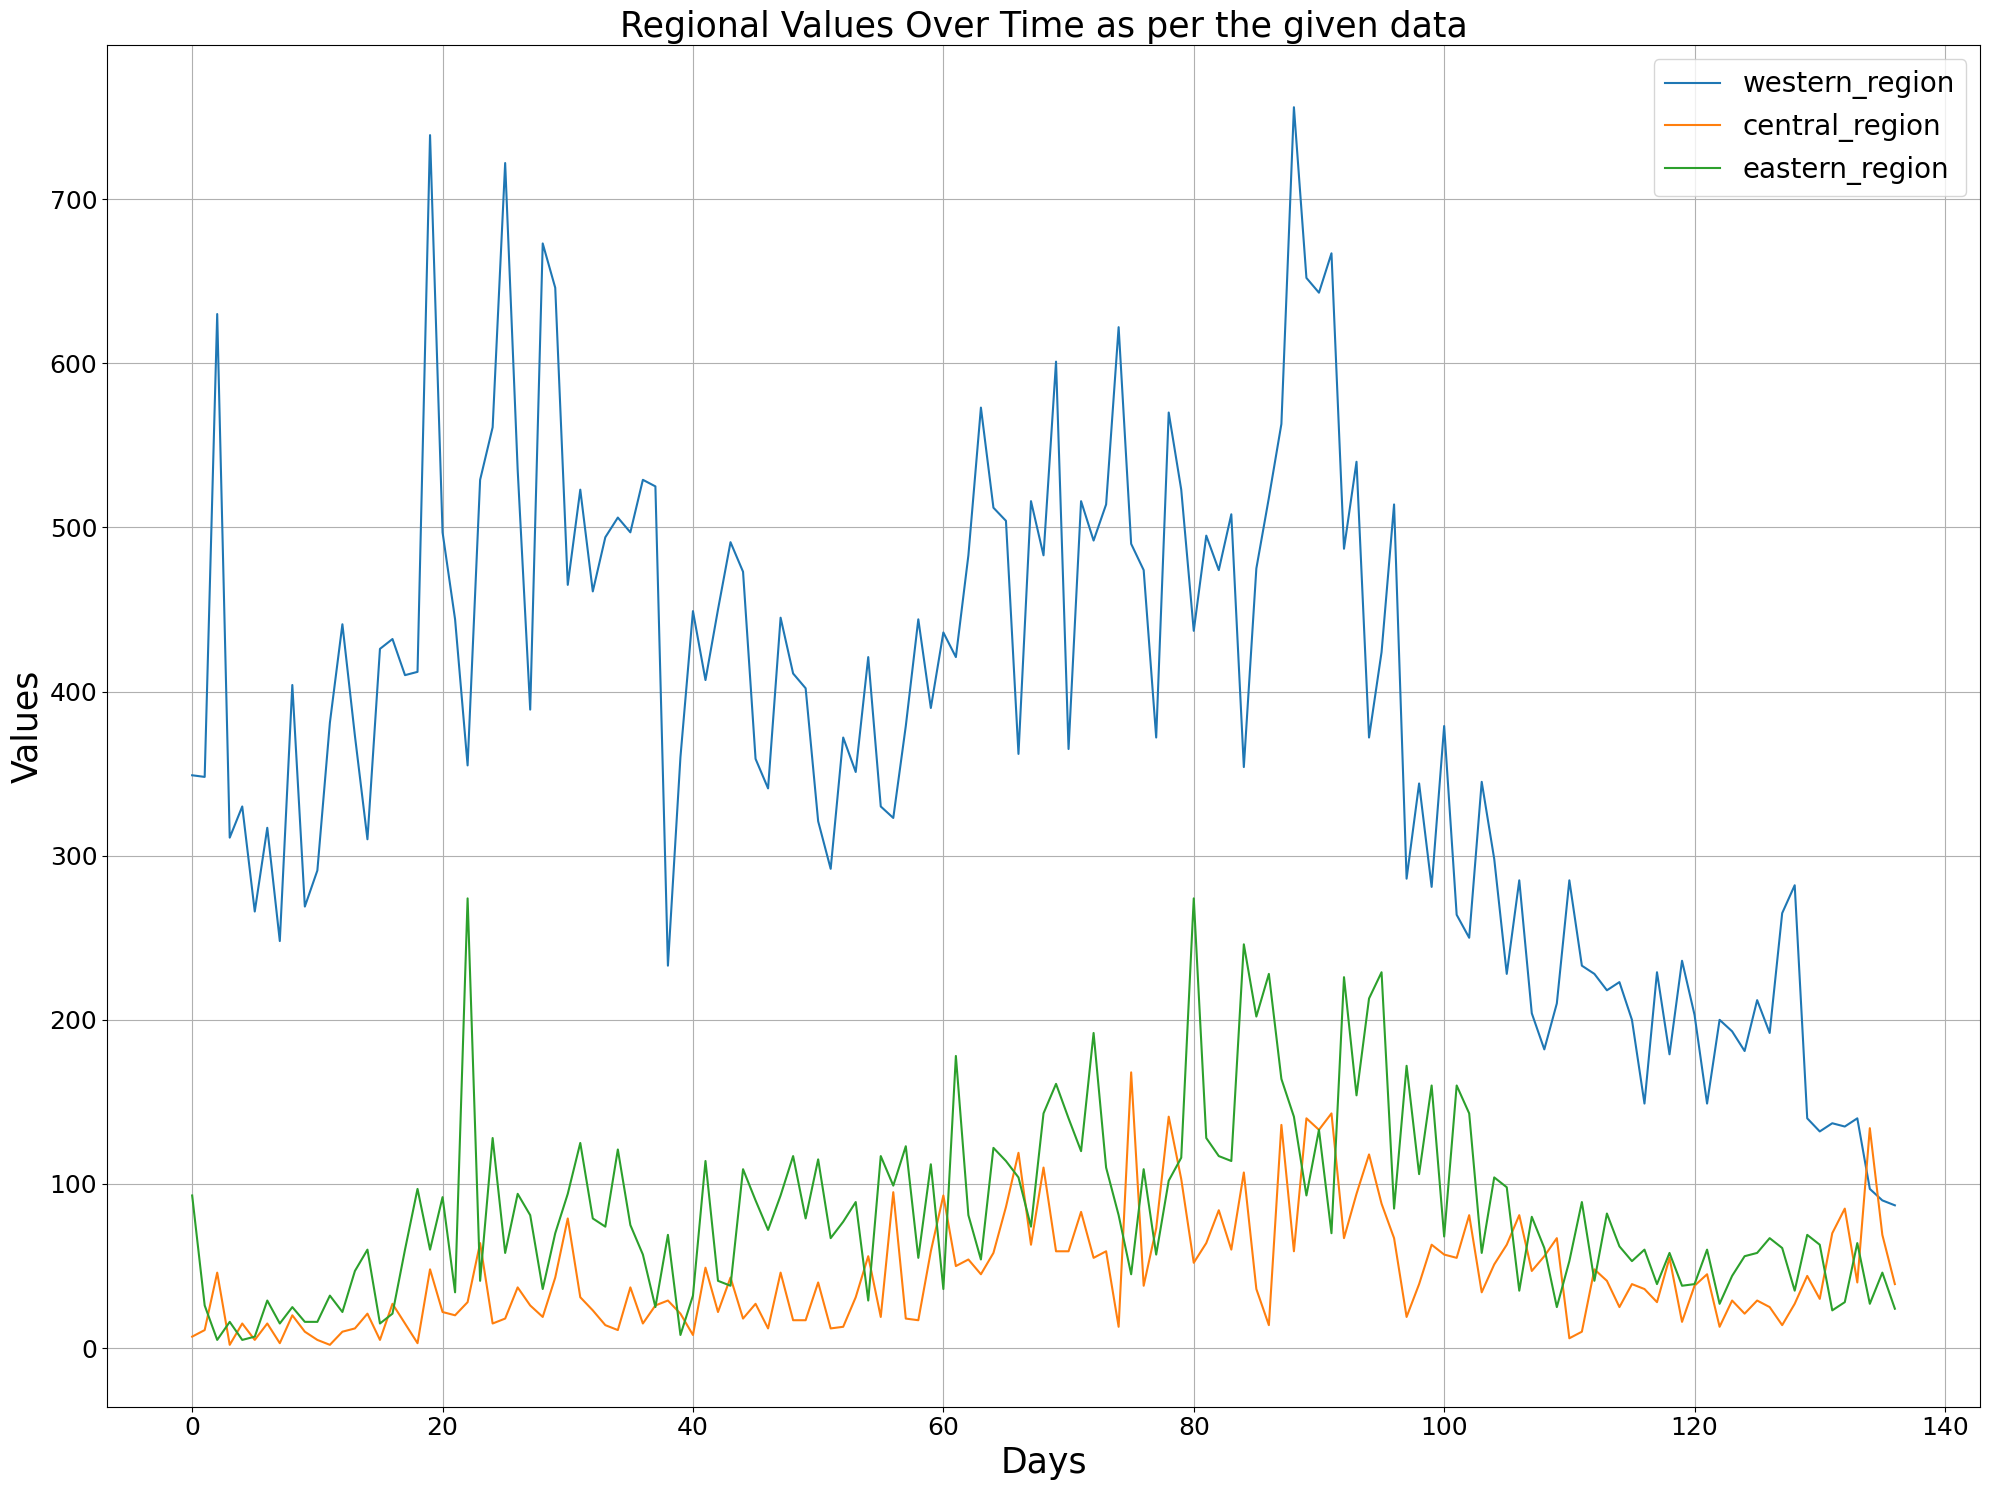

In [559]:
grouped_df.index = pd.to_datetime(grouped_df.index)

# Calculate the number of days elapsed from the start date
start_date = grouped_df.index.min()
grouped_df['Days'] = (grouped_df.index - start_date).days

# Plotting
plt.figure(figsize=(20, 15))

# Plot each region
for region in region_assignments.keys():
    plt.plot(grouped_df['Days'][:137], grouped_df[region][:137], label=region)

# Formatting the plot
plt.xlabel('Days', fontsize=25) 
plt.ylabel('Values', fontsize=25) 
plt.title('Regional Values Over Time as per the given data', fontsize=25)
plt.legend(fontsize=20) 
plt.grid(True)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18) 
plt.tight_layout()

# Show the plot
plt.show()

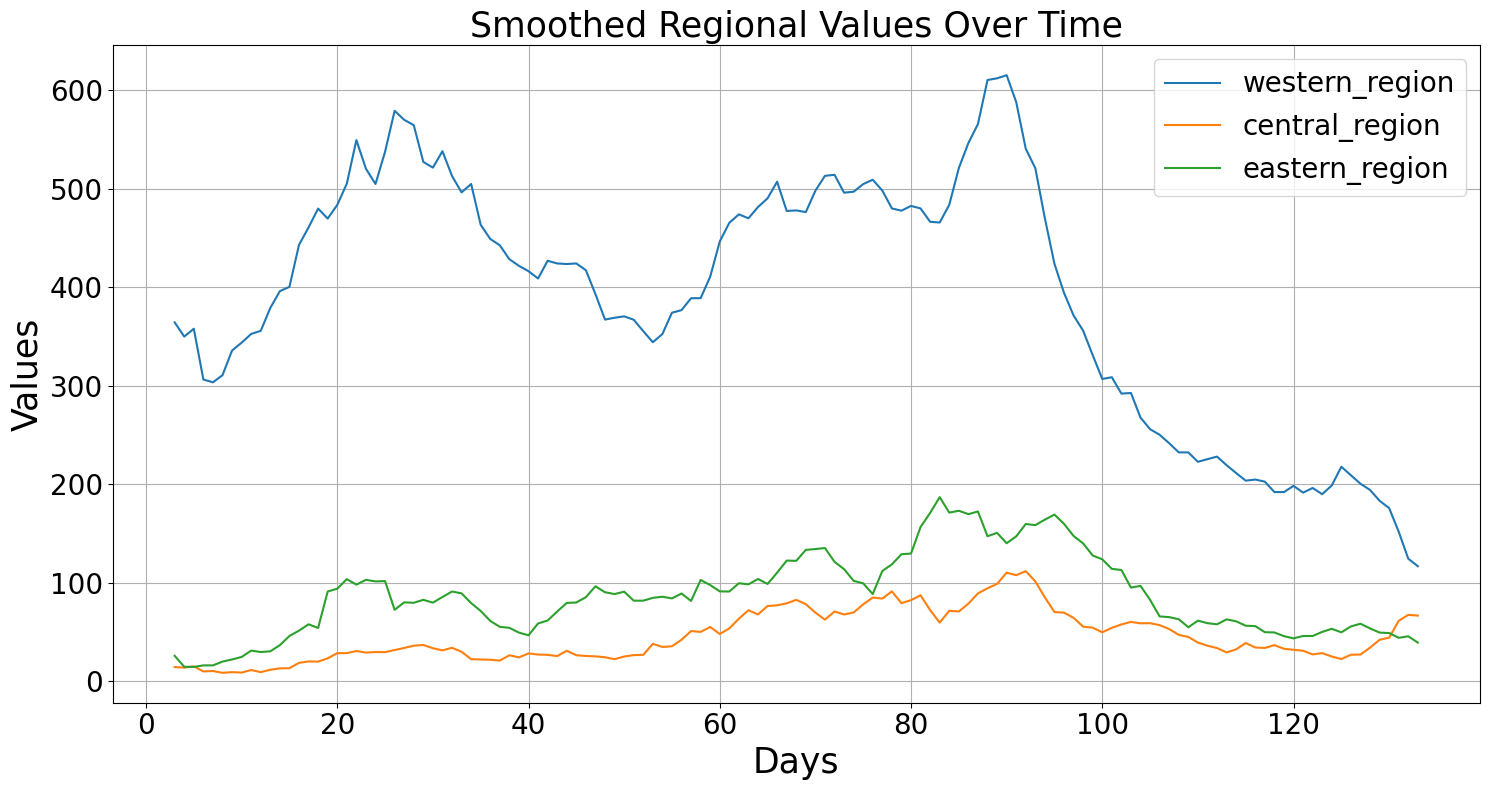

In [560]:
window_size = 7

# Compute the rolling average for each region
smoothed_grouped_df = grouped_df.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(15, 8))

for region in region_assignments.keys():
    plt.plot(smoothed_grouped_df['Days'][:137], smoothed_grouped_df[region][:137], label=region) 

# Formatting the plot
plt.xlabel('Days', fontsize=25)
plt.ylabel('Values', fontsize=25)
plt.title('Smoothed Regional Values Over Time', fontsize=25)
plt.legend(fontsize=20)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

# Show the plot
plt.show()


In [561]:
grouped_df.to_csv('exported.csv',index=True)
df

,COL,GAM,PUT,KAL,ANU,KAN,KUR,POL,JAF,RAT,...,BAD,MAT,BAT,HAM,VAV,TRI,NE,KIL,MAN,MUL
0,289,22,1,8,2,80,3,1,0,20,...,2,0,6,1,0,1,0,0,0,0
1,248,44,5,10,1,24,4,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,557,63,2,2,39,0,3,0,0,0,...,3,1,0,1,1,1,0,0,0,0
3,157,56,0,79,0,2,2,0,0,1,...,5,0,5,0,0,0,1,0,0,0
4,260,35,1,27,3,4,11,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,56,35,4,13,1,2,2,1,78,13,...,1,9,1,0,0,0,17,0,0,0
133,47,40,2,14,27,3,6,2,5,31,...,13,1,0,17,0,0,0,0,0,0
134,59,18,5,10,6,4,10,0,109,0,...,10,7,0,5,2,0,0,0,2,0
135,27,25,0,13,5,5,3,0,46,20,...,15,3,2,11,1,11,1,1,0,2


C:\Users\pradi\AppData\Local\Temp\ipykernel_17028\2755071605.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  I1, I2, I3, R1, R2, R3  = grouped_df['western_region'][0], grouped_df['central_region'][0], grouped_df['eastern_region'][0], 0, 0, 0


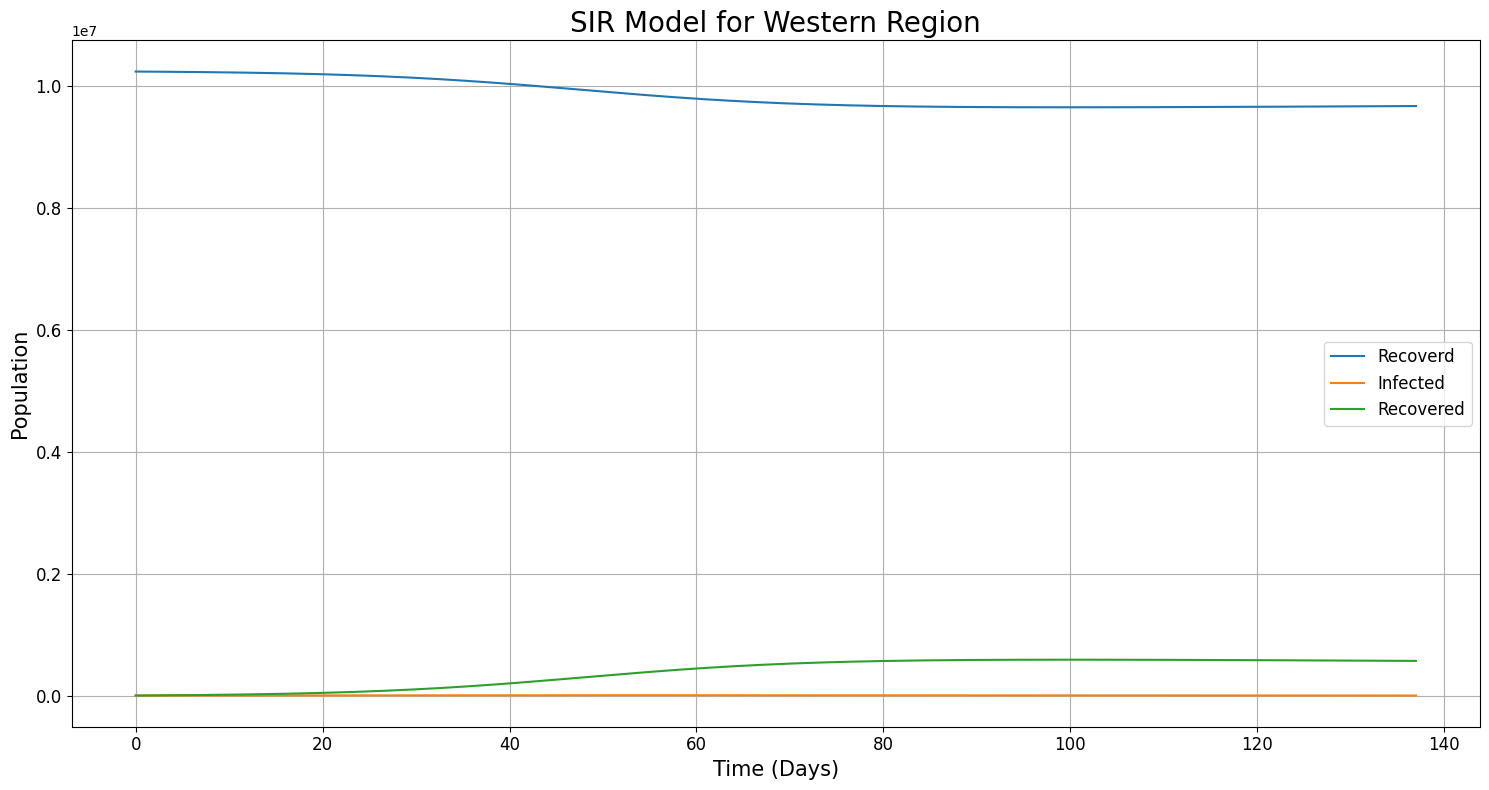

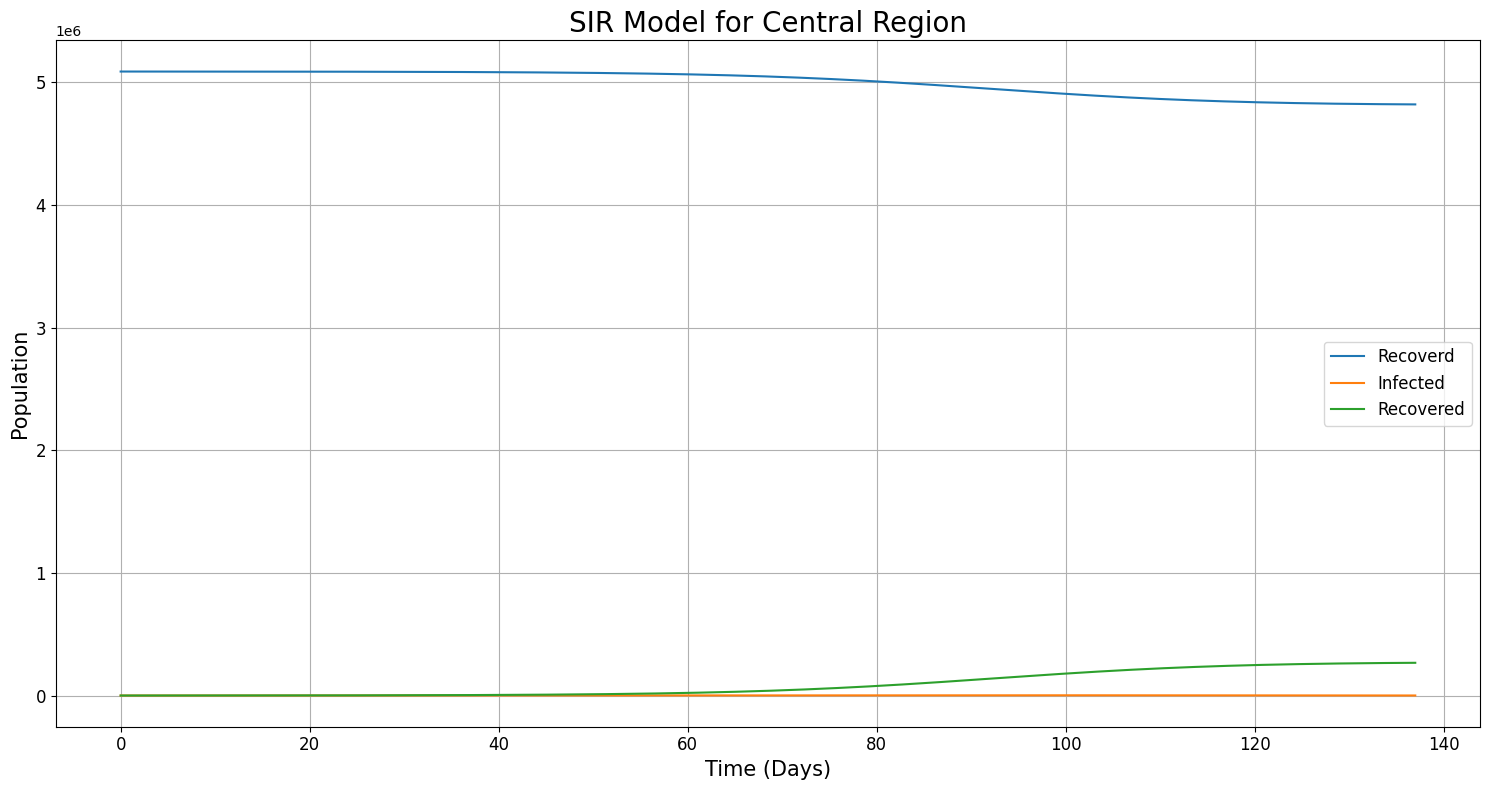

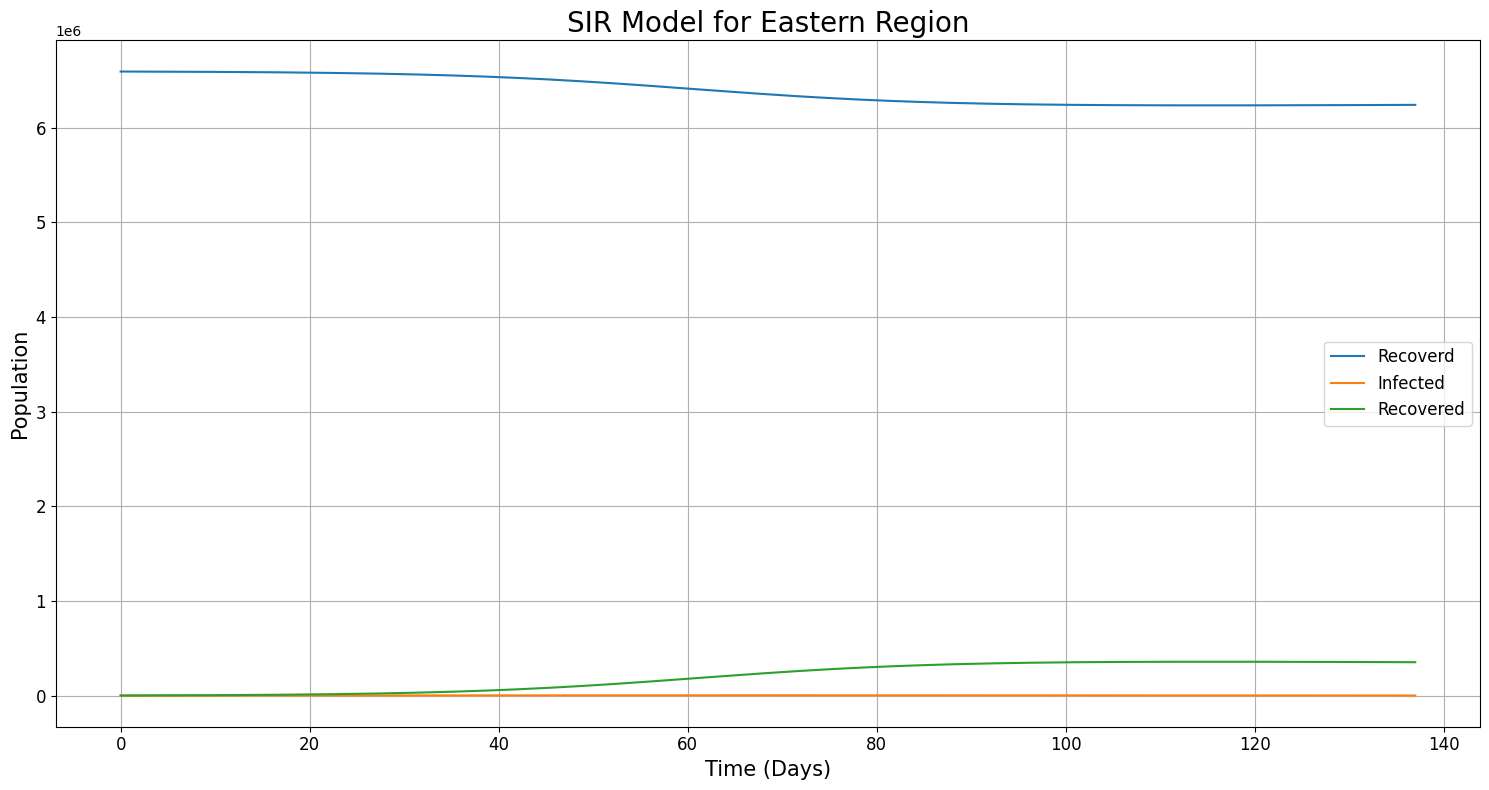

In [562]:
# Population of srilanka of year 2020
N1 = 10236000   # Population of western region
N2 = 5089000    # Population of Central region 
N3 = 6594000     # Population of Eastern region

# Initial number of infected and recovered individuals, I1, I2, I3, R1, R2, R3.
I1, I2, I3, R1, R2, R3  = grouped_df['western_region'][0], grouped_df['central_region'][0], grouped_df['eastern_region'][0], 0, 0, 0

# Everyone else, S1,S2, S3  is Recoverd to infection initially for each region
S1 = N1 - I1 - R1       # Recoverd of western region
S2 = N2 - I2 - R2       # Recoverd of central region
S3 = N3 - I3 - R3       # Recoverd of eastern region

d = 5000
t = np.linspace(0, d, d)

alpha= 0.00004     #Birth rate
mu = 0.00004       #Death Rate

# Transmission or infection rate of each region without considering lockdown

beta1 = 0.0735      # Western Region
beta2 = 0.0735      # Central Region
beta3 = 0.0735      # Eastern Region

# # Transmission or infection rate of each region with considering lockdown

# beta1 = 0.0732    # Western Region
# beta2 = 0.0732    # Central Region
# beta3 = 0.0732    # Eastern Region

# Recovery rate of each region

gamma1=  (1/14)         # Recovered rate in region 1
gamma2 = (1/14)         # Recovered rate in region 2
gamma3 = (1/14)         # Recovered rate in region 3

# Here we assume the rate of travelling or mobility of each region 

rho12 = 0.0004          # Travelling rate from Western to region 2
rho21 = 0.0015          # Travelling rate from region 2 to Western 1
rho13 = 0.0006          # Travelling rate from region 1 to region 3
rho23 = 0.0007          # Travelling rate from region 2 to region 3
rho31 = 0.0011          # Travelling rate from region 3 to region 1
rho32 = 0.0006          # Travelling rate from region 3 to region 2

# # Here we assume the rate of travelling or mobility of each region 

# rho12 = 0             # Travelling rate from Western to region 2
# rho21 = 0             # Travelling rate from region 2 to Western 1
# rho13 = 0             # Travelling rate from region 1 to region 3
# rho23 = 0             # Travelling rate from region 2 to region 3
# rho31 = 0             # Travelling rate from region 3 to region 1
# rho32 = 0             # Travelling rate from region 3 to region 2

# The SIR Network model differential equations
def model(y, t, alpha ,beta1, beta2, beta3, gamma1, gamma2, gamma3, mu, rho12, rho13, rho31, rho32, rho21, rho23):
    S1, S2, S3, I1, I2, I3, R1, R2, R3 = y

    #Western Region
    dS1dt = alpha*N1-(beta1*S1*I1)/N1- (rho12*beta1*S1*I2)/N1 - (rho13*beta1*S1*I3)/N1- mu*S1
    dI1dt = (beta1*S1*I1)/N1 - mu*I1- gamma1*I1 + (rho21*beta2*S2*I1)/N2 + (rho31*beta3*S3*I1)/N3
    dR1dt = gamma1* I1- mu*R1

    # Central Region
    dS2dt = alpha*N2-(beta2*S2*I2)/N2 - (rho21*beta2*S2*I1)/N2 - (rho23*beta2*S2*I3)/N2- mu*S2
    dI2dt = (beta2*S2*I2)/N2- mu*I2 - gamma2* I2 + (rho12*beta1*S1*I2)/N1+ (rho32*beta3*S3*I2)/N3
    dR2dt = gamma2*I2 -mu*R2

    # Eastern Region
    dS3dt = alpha*N3-(beta3*S3*I3)/N3  - (rho31*beta3*S3*I1)/N3 - (rho32*beta3*S3*I2)/N3- mu*S3
    dI3dt = (beta3*S3*I3)/N3  - mu*I3- gamma3* I3 + (rho13*beta1*S1*I3)/N1 + (rho23*beta2*S2*I3)/N2
    dR3dt = gamma3*I3- mu*R3
    return dS1dt, dS2dt, dS3dt, dI1dt, dI2dt, dI3dt, dR1dt, dR2dt,dR3dt

# Initial conditions vector
y0 = S1, S2, S3, I1, I2, I3, R1, R2, R3

# Integrate the SIR equations over the time grid, t.def
sol = odeint(model, y0, t, args=(alpha, beta1, beta2, beta3, gamma1, gamma2, gamma3, mu, rho12, rho13, rho31, rho32, rho21, rho23))

# Extract the results
S1 = sol[:, 0]
S2 = sol[:, 1]
S3 = sol[:, 2]
I1 = sol[:, 3]
I2 = sol[:, 4]
I3 = sol[:, 5]
R1 = sol[:, 6]
R2 = sol[:, 7]
R3 = sol[:, 8]

grouped_df['Number'] = grouped_df.reset_index().index + 1
t_rescaled = np.linspace(0, d/36.5, d)

# Plot for Western Region
# plt.subplot(3, 1, 1)

plt.figure(figsize=(15, 8))
plt.plot(t_rescaled, S1, label='Recoverd')
plt.plot(t_rescaled, I1, label='Infected')
plt.plot(t_rescaled, R1, label='Recovered')
plt.title('SIR Model for Western Region', fontsize=20)
plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)  
plt.legend(prop={'size': 12})  
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot for Central Region
plt.figure(figsize=(15, 8))
plt.plot(t_rescaled, S2, label='Recoverd')
plt.plot(t_rescaled, I2, label='Infected')
plt.plot(t_rescaled, R2, label='Recovered')
plt.title('SIR Model for Central Region',fontsize=20)
plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.legend(prop={'size': 12})  
plt.grid(True)
plt.tight_layout()
plt.show()

# # Plot for Eastern Region
plt.figure(figsize=(15, 8))
plt.plot(t_rescaled, S3, label='Recoverd')
plt.plot(t_rescaled, I3, label='Infected')
plt.plot(t_rescaled, R3, label='Recovered')
plt.title('SIR Model for Eastern Region',fontsize=20)
plt.xlabel('Time (Days)', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(prop={'size': 12}) 
plt.grid(True)
plt.tight_layout()
plt.show()

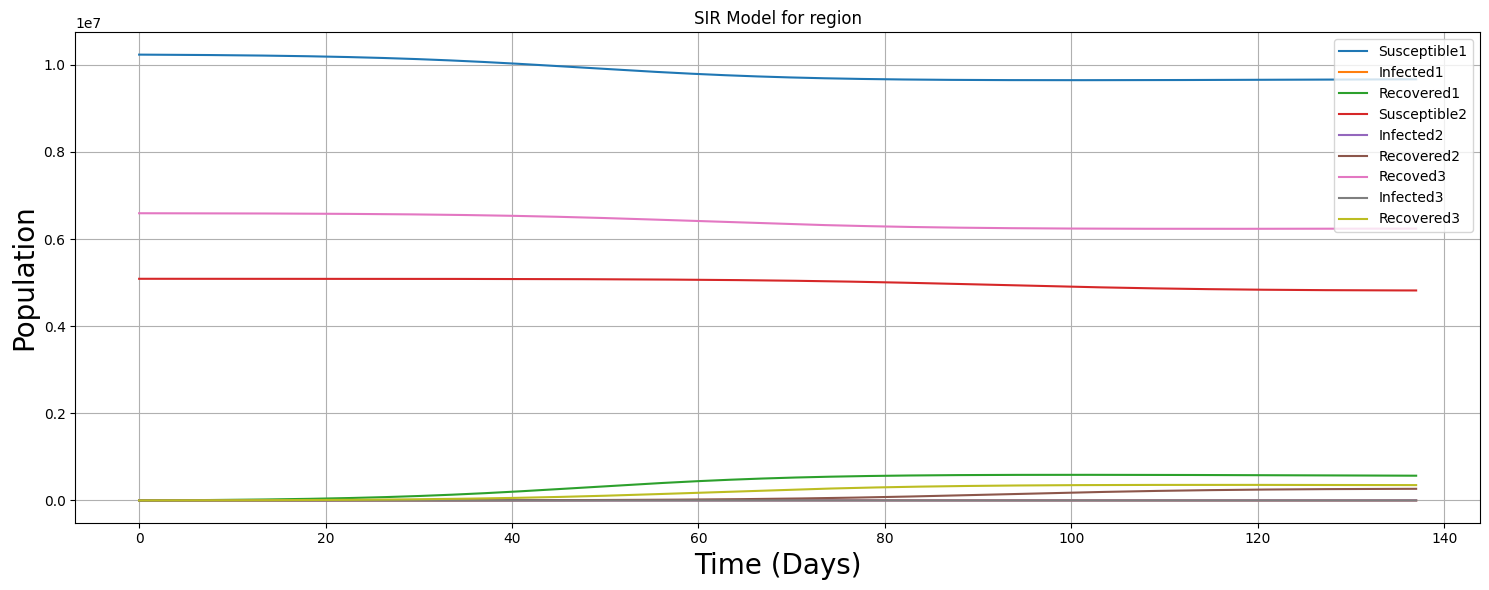

In [563]:
plt.figure(figsize=(15, 6))

plt.plot(t_rescaled, S1, label='Susceptible1')
plt.plot(t_rescaled, I1, label='Infected1')
plt.plot(t_rescaled, R1, label='Recovered1')

# Plot for Central Region
plt.plot(t_rescaled, S2, label='Susceptible2')
plt.plot(t_rescaled, I2, label='Infected2')
plt.plot(t_rescaled, R2, label='Recovered2')

# Plot for Eastern Region
plt.plot(t_rescaled, S3, label='Recoved3')
plt.plot(t_rescaled, I3, label='Infected3')
plt.plot(t_rescaled, R3, label='Recovered3')
plt.title('SIR Model for region')
plt.xlabel('Time (Days)',fontsize = 20)
plt.ylabel('Population',fontsize = 20)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Peak Day and Number of Cases for Infected Cases in Each Region:
Western Region:
Peak Day: 48
Number of Cases on Peak Day: 5149

Central Region:
Peak Day: 93
Number of Cases on Peak Day: 2127

Eastern Region:
Peak Day: 61
Number of Cases on Peak Day: 2924



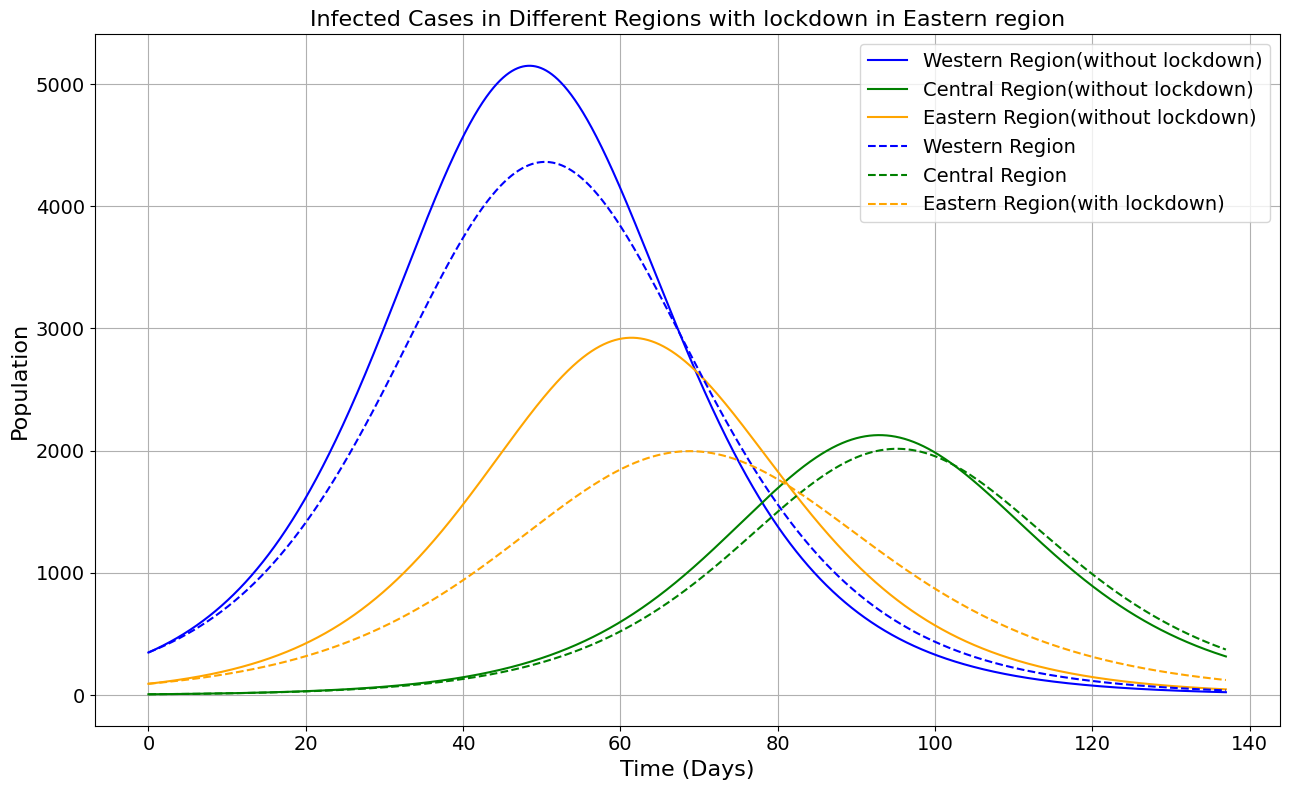

Peak Day and Number of Cases for Infected(With Lockdown) Cases in Each Region:
Western(With Lockdown) Region:
Peak Day: 50
Number of Cases on Peak Day: 4363

Central(With Lockdown) Region:
Peak Day: 95
Number of Cases on Peak Day: 2015

Eastern(With Lockdown) Region:
Peak Day: 69
Number of Cases on Peak Day: 1996



In [564]:
# Part 1 while considering mobility

# Population of Sri Lanka of year 2020
N1 = 10236000   # Population of Western region
N2 = 5089000    # Population of Central region 
N3 = 6594000    # Population of Eastern region

# Initial number of infected and recovered individuals for each region
I1, I2, I3, R1, R2, R3 = 349, 7, 93, 0, 0, 0

# Everyone else is Recoved to infection initially for each region
S1 = N1 - I1 - R1       # Susceptible of Western region
S2 = N2 - I2 - R2       # Susceptible of Central region
S3 = N3 - I3 - R3       # Susceptible of Eastern region

d = 5000
t = np.linspace(0, d, d)

alpha = 0.00004     # Birth rate
mu = 0.00004       # Death Rate

# Transmission or infection rate of each region without considering lockdown
beta1 = 0.0735    # Western Region
beta2 = 0.0735    # Central Region
# beta3 = 0.0735    # Eastern Region

# Recovery rate of each region
gamma1 = 1/14   # Recovered rate in region 1
gamma2 = 1/14   # Recovered rate in region 2
gamma3 = 1/14   # Recovered rate in region 3

# Rate of traveling or mobility of each region

rho12 = 0.0004   # Travelling rate from Western to region 2
# rho13 = 0.0006   # Travelling rate from region 1 to region 3
rho21 = 0.0015   # Travelling rate from region 2 to Western 1
# rho23 = 0.0007   # Travelling rate from region 2 to region 3
# rho31 = 0.0011   # Travelling rate from region 3 to region 1
# rho32 = 0.0006   # Travelling rate from region 3 to region 2


# The SIR Network model differential equations
def model(y, t, alpha, beta1, beta2, beta3, gamma1, gamma2, gamma3, mu, rho12, rho13, rho31, rho32, rho21, rho23):
    S1, S2, S3, I1, I2, I3, R1, R2, R3 = y

    # Western Region
    dS1dt = alpha * N1 - (beta1 * S1 * I1) / N1 - (rho12 * beta1 * S1 * I2) / N1 - (rho13 * beta1 * S1 * I3) / N1 - mu * S1
    dI1dt = (beta1 * S1 * I1) / N1 - mu * I1 - gamma1 * I1 + (rho21 * beta2 * S2 * I1) / N2 + (rho31 * beta3 * S3 * I1) / N3
    dR1dt = gamma1 * I1 - mu * R1

    # Central Region
    dS2dt = alpha * N2 - (beta2 * S2 * I2) / N2 - (rho21 * beta2 * S2 * I1) / N2 - (rho23 * beta2 * S2 * I3) / N2 - mu * S2
    dI2dt = (beta2 * S2 * I2) / N2 - mu * I2 - gamma2 * I2 + (rho12 * beta1 * S1 * I2) / N1 + (rho32 * beta3 * S3 * I2) / N3
    dR2dt = gamma2 * I2 - mu * R2

    # Eastern Region
    dS3dt = alpha * N3 - (beta3 * S3 * I3) / N3 - (rho31 * beta3 * S3 * I1) / N3 - (rho32 * beta3 * S3 * I2) / N3 - mu * S3
    dI3dt = (beta3 * S3 * I3) / N3 - mu * I3 - gamma3 * I3 + (rho13 * beta1 * S1 * I3) / N1 + (rho23 * beta2 * S2 * I3) / N2
    dR3dt = gamma3 * I3 - mu * R3
    
    return dS1dt, dS2dt, dS3dt, dI1dt, dI2dt, dI3dt, dR1dt, dR2dt, dR3dt

# Initial conditions vector
y0 = S1, S2, S3, I1, I2, I3, R1, R2, R3

# Integrate the SIR equations over the time grid
sol = odeint(model, y0, t, args=(alpha, beta1, beta2, beta3, gamma1, gamma2, gamma3, mu, rho12, rho13, rho31, rho32, rho21, rho23))

# Extract the results
S1 = sol[:, 0]
S2 = sol[:, 1]
S3 = sol[:, 2]
I1 = sol[:, 3]
I2 = sol[:, 4]
I3 = sol[:, 5]
R1 = sol[:, 6]
R2 = sol[:, 7]
R3 = sol[:, 8]

t_rescaled = np.linspace(0, d/36.5, len(t))  # Rescale x-axis to represent days

plt.figure(figsize=(25, 8))

# Part 1 Plot
plt.subplot(1, 2, 1)
plt.plot(t_rescaled, I1, label='Western Region(without lockdown)', color='blue')
plt.plot(t_rescaled, I2, label='Central Region(without lockdown)', color='green')
plt.plot(t_rescaled, I3, label='Eastern Region(without lockdown)', color='orange')
plt.title('Infected Cases in Different Regions (No Lockdown)',fontsize=14)
plt.legend(prop={'size': 15}) 
plt.xlabel('Time (Days)',fontsize=14)
plt.ylabel('Population',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.legend()
plt.grid(True)


peak_day_infected = {}
peak_cases_infected = {}
for region, infected_cases in {'Western': I1, 'Central': I2, 'Eastern': I3}.items():
    peak_day_infected[region] = np.argmax(infected_cases) + 1
    peak_cases_infected[region] = infected_cases[np.argmax(infected_cases)]  
# Print the results
print("Peak Day and Number of Cases for Infected Cases in Each Region:")
for region in ['Western', 'Central', 'Eastern']:
    print(region, "Region:")
    print("Peak Day:", round(peak_day_infected[region]/36.5))
    print("Number of Cases on Peak Day:", int(peak_cases_infected[region]))
    print()

# Part 2 Plot
plt.subplot(1, 2, 1)
# Population of Sri Lanka of year 2020
N1 = 10236000   # Population of Western region
N2 = 5089000    # Population of Central region 
N3 = 6594000    # Population of Eastern region

# Initial number of infected and recovered individuals for each region
I1, I2, I3, R1, R2, R3 = 349, 7, 93, 0, 0, 0

# Everyone else is susceptible to infection initially for each region
S1 = N1 - I1 - R1       # Susceptible of Western region
S2 = N2 - I2 - R2       # Susceptible of Central region
S3 = N3 - I3 - R3       # Susceptible of Eastern region

d = 5000
t = np.linspace(0, d, d)

alpha = 0.00004     # Birth rate
mu = 0.00004       # Death Rate

# Transmission or infection rate of each region with considering lockdown

# beta1 = 0.0732    # Western Region
# beta2 = 0.0732  # Central Region
beta3 = 0.0732   # Eastern Region

# Recovery rate of each region

gamma1 = 1/14   # Recovered rate in region 1
gamma2 = 1/14   # Recovered rate in region 2
gamma3 = 1/14   # Recovered rate in region 3

# Rate of traveling or mobility of each region

# rho12 = 0   # No traveling between regions
# rho21 = 0   # No traveling between regions
rho13 = 0   # No traveling between regions
rho23 = 0   # No traveling between regions
rho31 = 0   # No traveling between regions
rho32 = 0   # No traveling between regions

# The SIR Network model differential equations

def model(y, t, alpha, beta1, beta2, beta3, gamma1, gamma2, gamma3, mu, rho12, rho13, rho31, rho32, rho21, rho23):
    S1, S2, S3, I1, I2, I3, R1, R2, R3 = y

    # Western Region
    dS1dt = alpha * N1 - (beta1 * S1 * I1) / N1 - mu * S1
    dI1dt = (beta1 * S1 * I1) / N1 - mu * I1 - gamma1 * I1
    dR1dt = gamma1 * I1 - mu * R1

    # Central Region
    dS2dt = alpha * N2 - (beta2 * S2 * I2) / N2 - mu * S2
    dI2dt = (beta2 * S2 * I2) / N2 - mu * I2 - gamma2 * I2
    dR2dt = gamma2 * I2 - mu * R2

    # Eastern Region
    dS3dt = alpha * N3 - (beta3 * S3 * I3) / N3 - mu * S3
    dI3dt = (beta3 * S3 * I3) / N3 - mu * I3 - gamma3 * I3
    dR3dt = gamma3 * I3 - mu * R3
    
    return dS1dt, dS2dt, dS3dt, dI1dt, dI2dt, dI3dt, dR1dt, dR2dt, dR3dt

# Initial conditions vector
y0 = S1, S2, S3, I1, I2, I3, R1, R2, R3

# Integrate the SIR equations over the time grid
sol = odeint(model, y0, t, args=(alpha, beta1, beta2, beta3, gamma1, gamma2, gamma3, mu, rho12, rho13, rho31, rho32, rho21, rho23))

# Extract the results
S1 = sol[:, 0]
S2 = sol[:, 1]
S3 = sol[:, 2]
I1 = sol[:, 3]
I2 = sol[:, 4]
I3 = sol[:, 5]
R1 = sol[:, 6]
R2 = sol[:, 7]
R3 = sol[:, 8]

t_rescaled = np.linspace(0, d/36.5, len(t))  # Rescale x-axis to represent days

plt.plot(t_rescaled, I1, label='Western Region', linestyle='--', color='blue')
plt.plot(t_rescaled, I2, label='Central Region', linestyle='--',color='green')
plt.plot(t_rescaled, I3, label='Eastern Region(with lockdown)', linestyle='--',color='orange')
plt.title('Infected Cases in Different Regions with lockdown in Eastern region', fontsize=16)
plt.xlabel('Time (Days)', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.legend(prop={'size': 14}) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.grid(True)

plt.tight_layout()
plt.show()


#  Find the day with the highest number of infected cases in each region while considering lockdown       
peak_day_infected_With_Lockdown = {}
peak_cases_infected_With_Lockdown = {}
for region, infected_cases in {'Western(With Lockdown)': I1, 'Central(With Lockdown)': I2, 'Eastern(With Lockdown)': I3}.items():
    peak_day_infected_With_Lockdown[region] = np.argmax(infected_cases) + 1
    peak_cases_infected_With_Lockdown[region] = infected_cases[np.argmax(infected_cases)]

# Print the results
print("Peak Day and Number of Cases for Infected(With Lockdown) Cases in Each Region:")
for region in ['Western(With Lockdown)', 'Central(With Lockdown)', 'Eastern(With Lockdown)']:
    print(region, "Region:")
    print("Peak Day:", round(peak_day_infected_With_Lockdown[region]/36.5))
    print("Number of Cases on Peak Day:", int(peak_cases_infected_With_Lockdown[region]))
    print()
